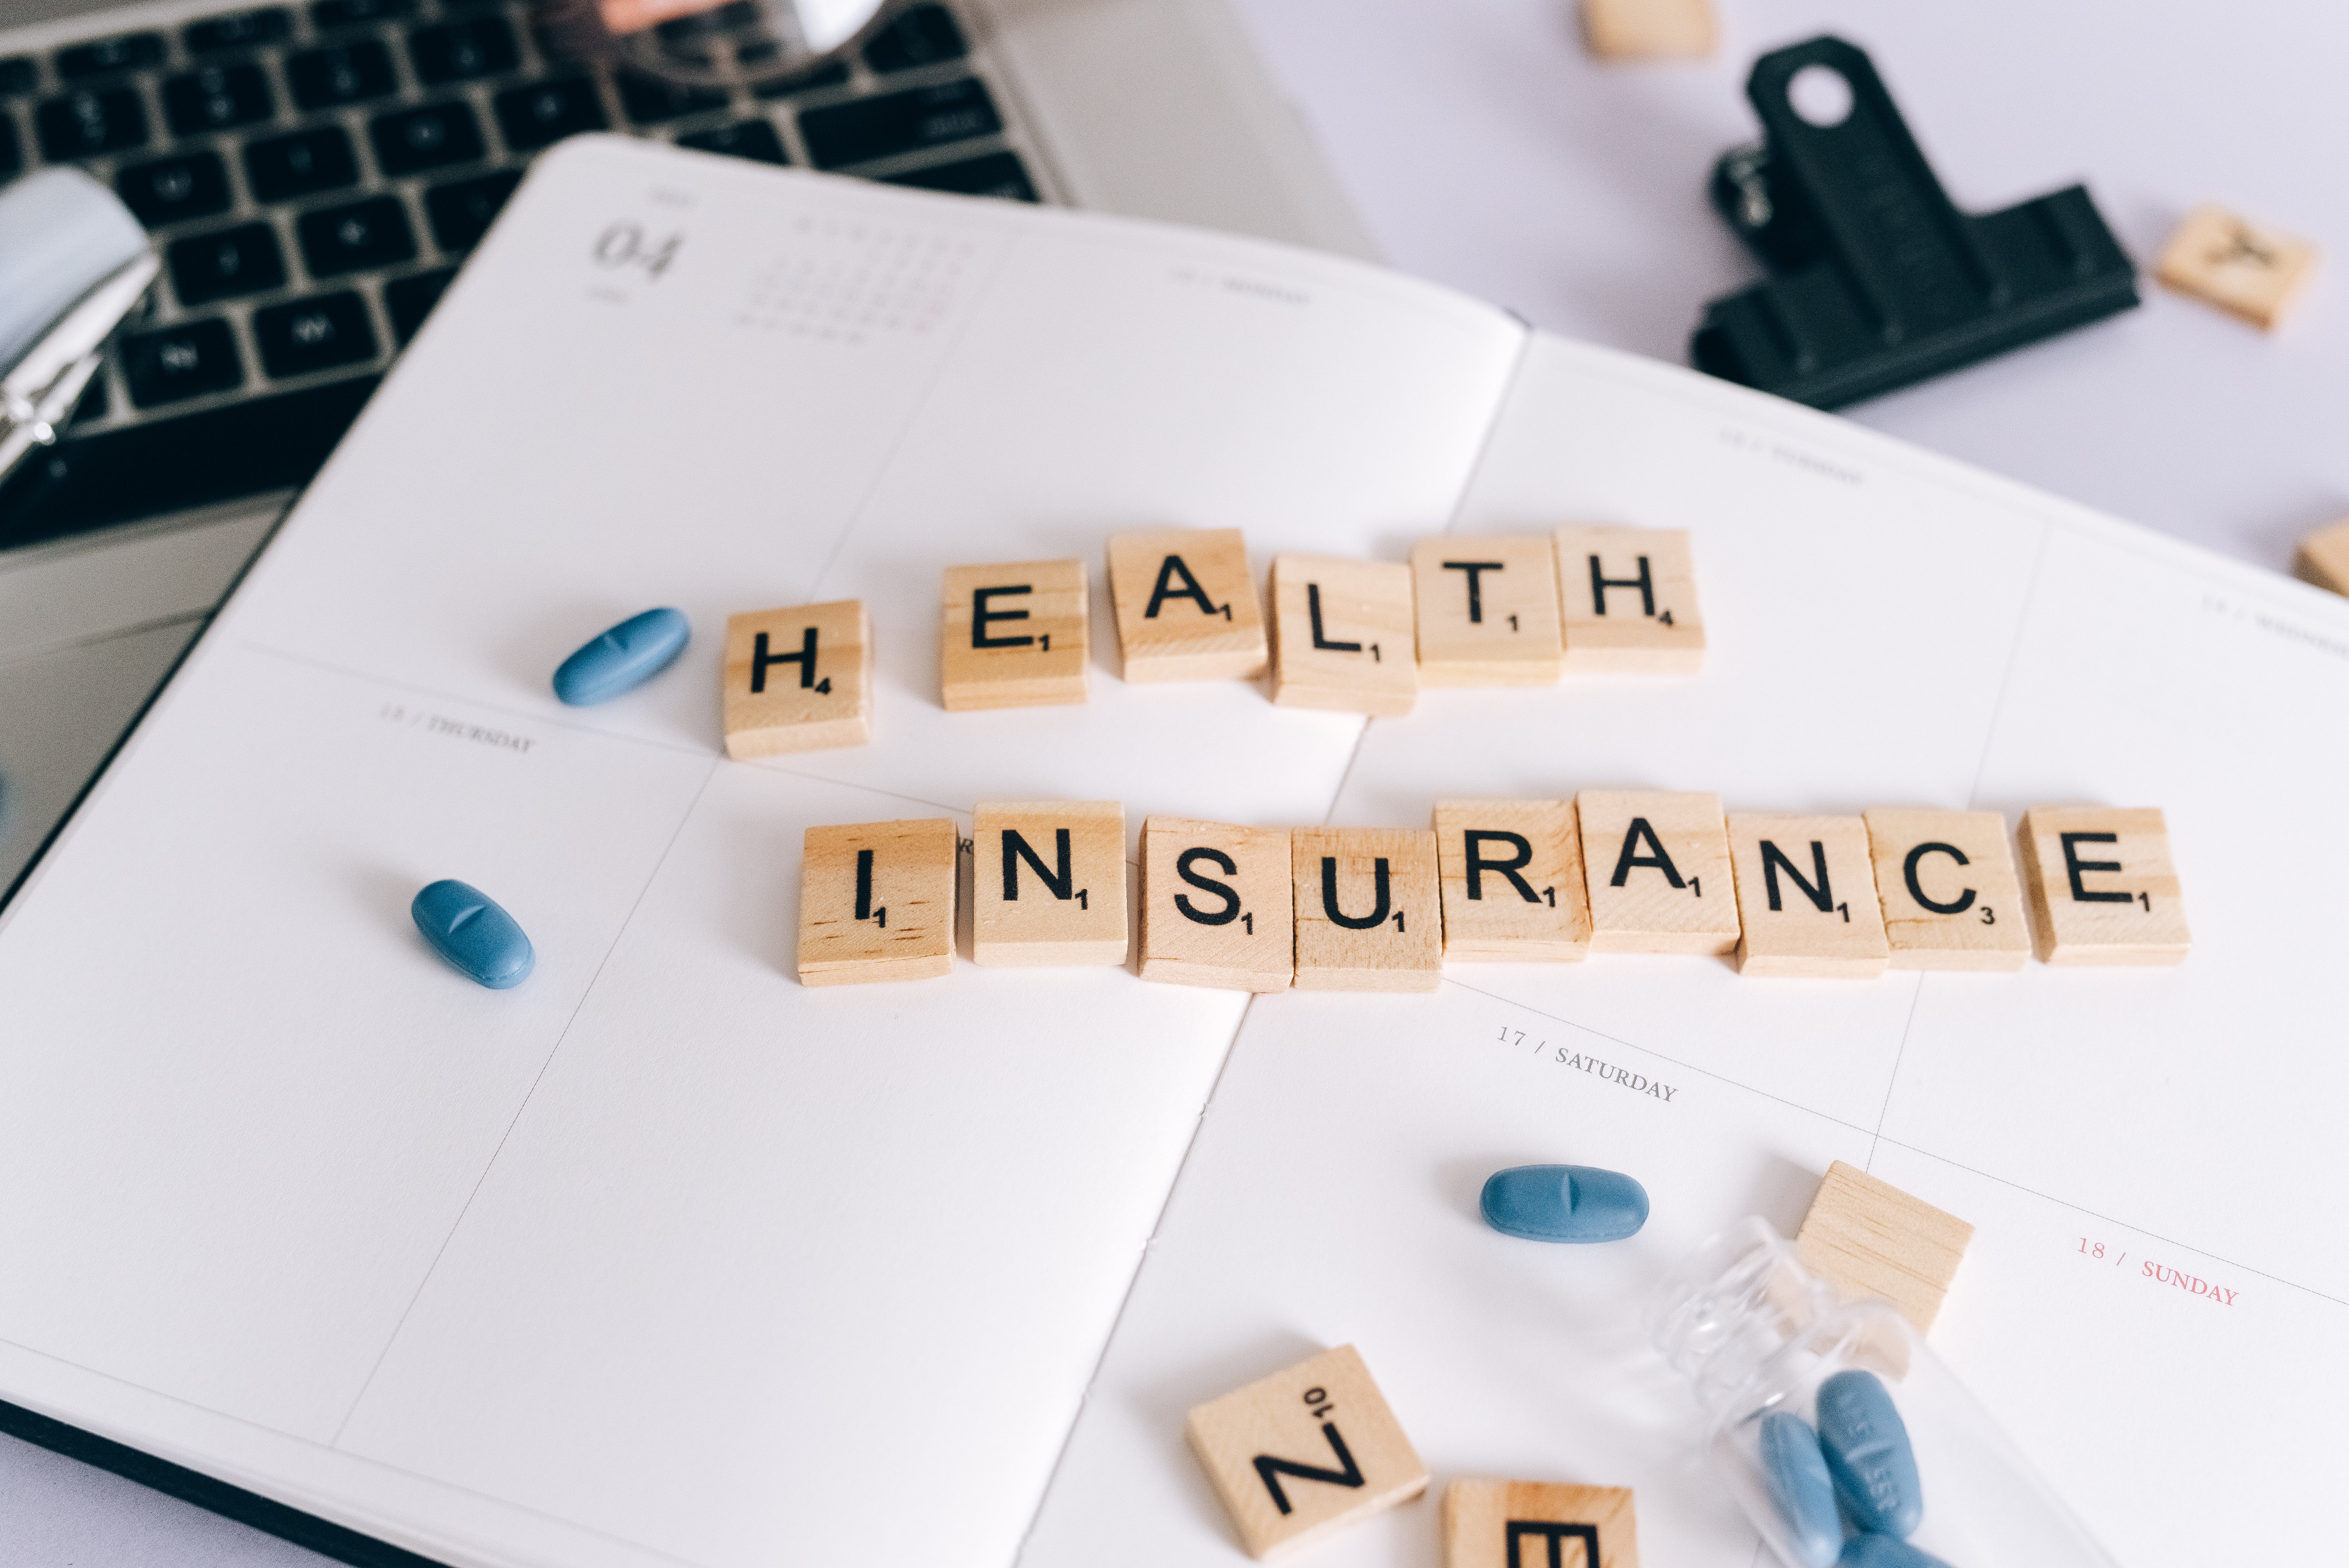

In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

In [68]:
df=pd.read_csv('insurance.csv')

In [69]:
#Look at first few rows
print(df.head())

   index  age     sex     bmi  children smoker     region      charges
0      0   19  female  27.900         0    yes  southwest  16884.92400
1      1   18    male  33.770         1     no  southeast   1725.55230
2      2   28    male  33.000         3     no  southeast   4449.46200
3      3   33    male  22.705         0     no  northwest  21984.47061
4      4   32    male  28.880         0     no  northwest   3866.85520


In [70]:
#Look at shape of data (rows x columns)
print(df.shape)

(1338, 8)


In [71]:
#Check for missing values
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
#overview of data
df.describe()

index          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    668.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       0.000000    18.000000    15.960000     0.000000   1121.873900
25%     334.250000    27.000000    26.296250     0.000000   4740.287150
50%     668.500000    39.000000    30.400000     1.000000   9382.033000
75%    1002.750000    51.000000    34.693750     2.000000  16639.912515
max    1337.000000    64.000000    53.130000     5.000000  63770.428010

In [73]:
#get data types
df.dtypes

index         int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Categorical Data

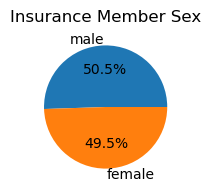

In [74]:
# Calculate the counts of 'male' and 'female'
sex_counts = df['sex'].value_counts()

# Set the figure size
plt.figure(figsize=(2, 2))

# Create a pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Insurance Member Sex')

# Display the chart
plt.show()


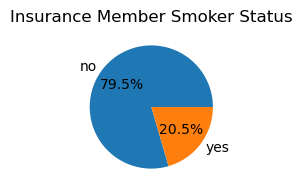

In [75]:
smoker_status = df['smoker'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(smoker_status, labels=smoker_status.index, autopct='%1.1f%%')
plt.title('Insurance Member Smoker Status')
plt.show()

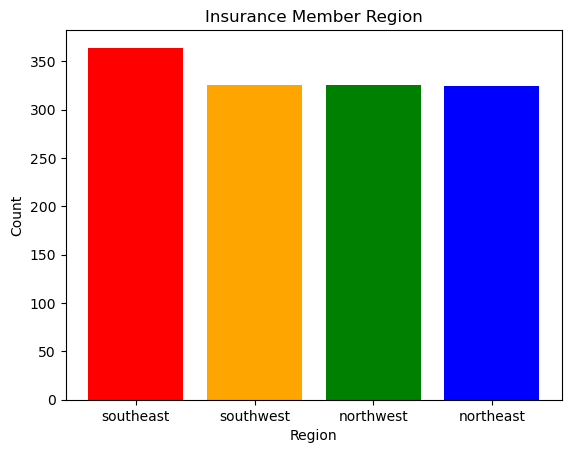

In [76]:
region_counts = df['region'].value_counts()
colors = ['red', 'orange', 'green', 'blue']
plt.bar(region_counts.index, region_counts, color=colors)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Insurance Member Region')
plt.show()

#### Continuous Data

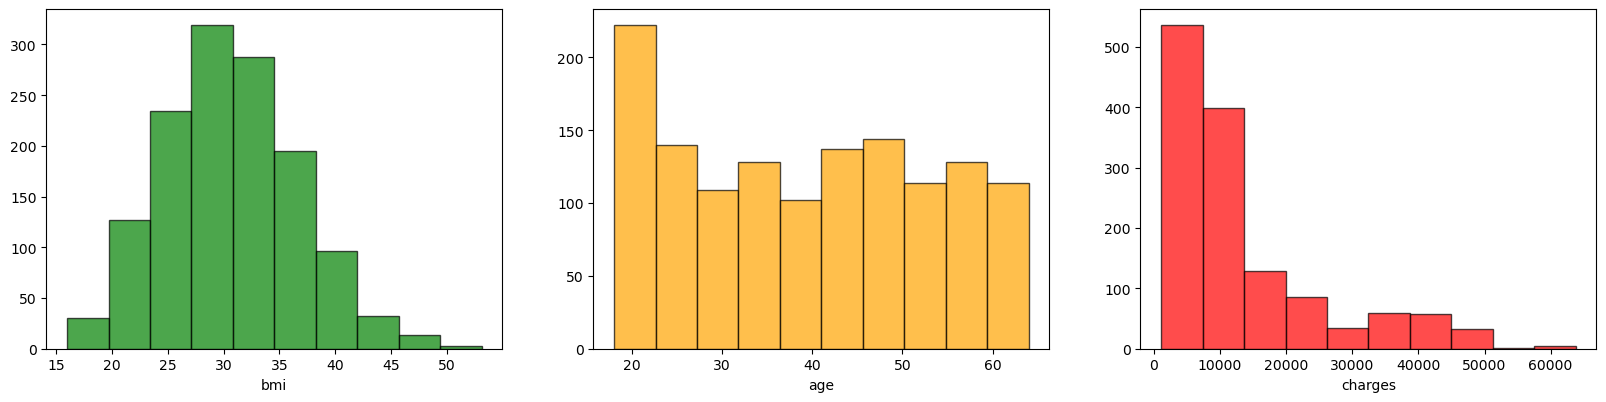

In [77]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

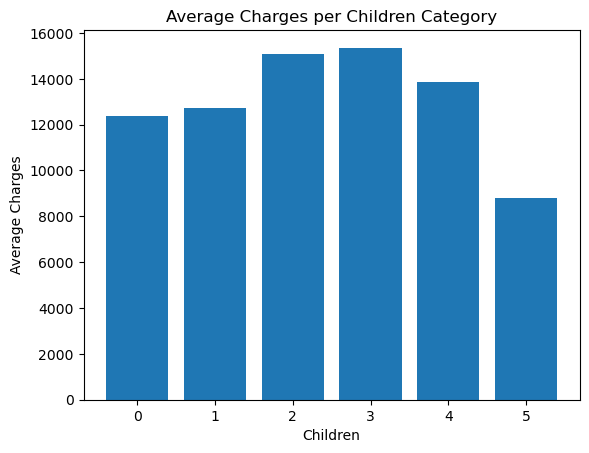

In [78]:
avg_charges = df.groupby('children')['charges'].mean()
plt.bar(avg_charges.index.astype(str), avg_charges)
plt.xlabel('Children')
plt.ylabel('Average Charges')
plt.title('Average Charges per Children Category')
plt.show()


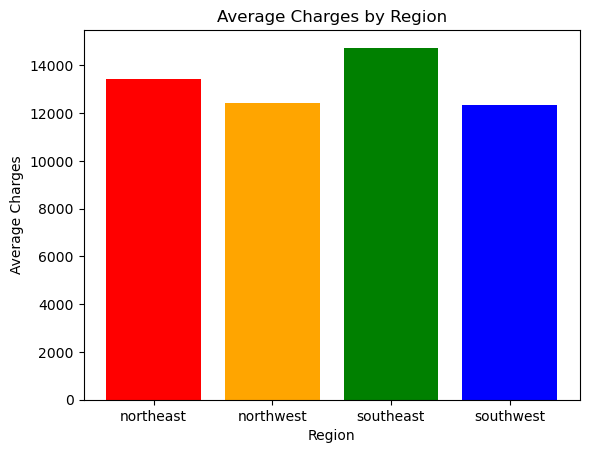

In [79]:
colors = ['red', 'orange', 'green', 'blue']
avg_charges = df.groupby('region')['charges'].mean()
plt.bar(avg_charges.index.astype(str), avg_charges, color=colors)
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.title('Average Charges by Region')
plt.show()

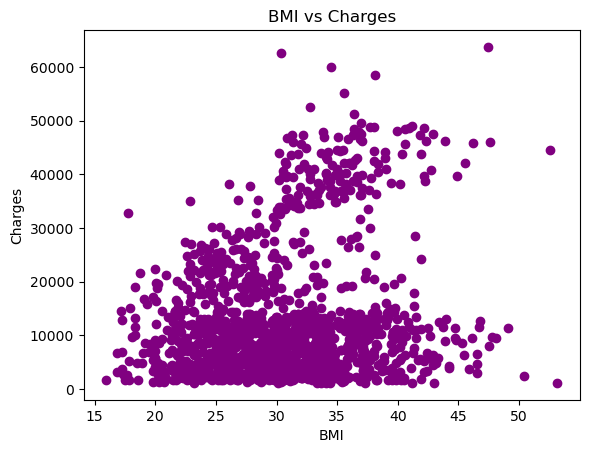

In [80]:
plt.scatter(df['bmi'], df['charges'], color='purple')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

{'region': {0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}, 'sex': {0: 'female', 1: 'male'}, 'smoker': {0: 'no', 1: 'yes'}}


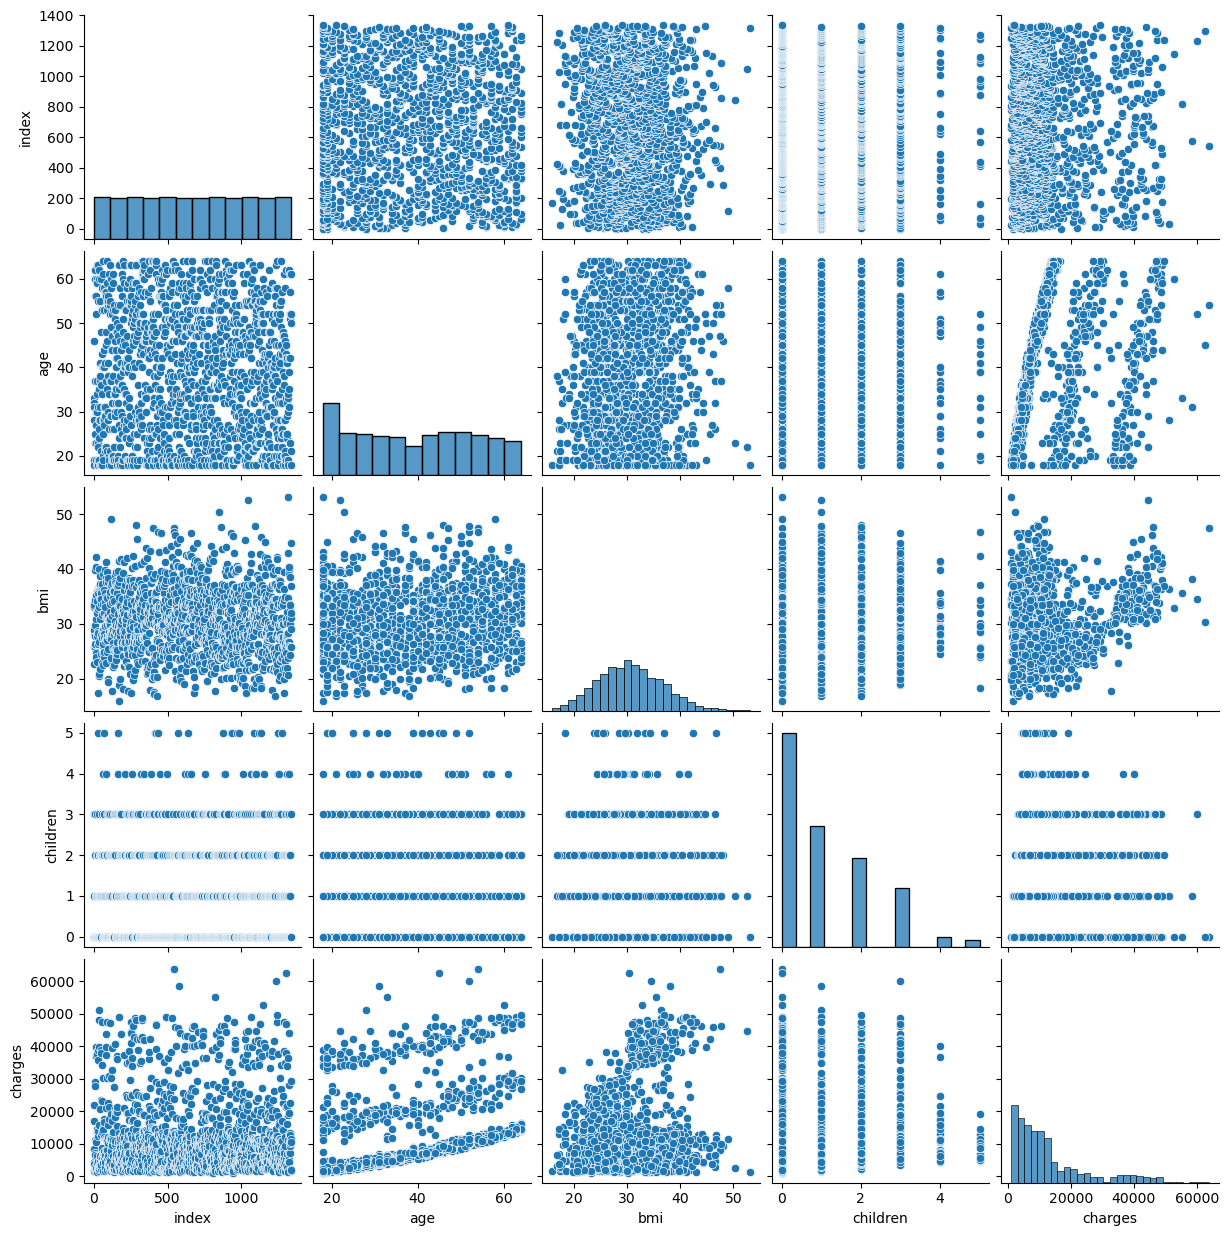

In [81]:
# Assuming 'df' is your dataframe

# Encode the categorical variables
df_encoded = df.copy()
df_encoded['region'] = df_encoded['region'].astype('category')
df_encoded['sex'] = df_encoded['sex'].astype('category')
df_encoded['smoker'] = df_encoded['smoker'].astype('category')

# Create a dictionary to map category labels to codes
category_mapping = {
    'region': dict(enumerate(df_encoded['region'].cat.categories)),
    'sex': dict(enumerate(df_encoded['sex'].cat.categories)),
    'smoker': dict(enumerate(df_encoded['smoker'].cat.categories))
}

# Reset the index
df_encoded.reset_index(drop=True, inplace=True)

# Create a pairplot
sns.pairplot(df_encoded)

# Display the code-to-category mapping
print(category_mapping)

In [82]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

NameError: name 'insurance_df' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges,hue=insurance_df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

In [83]:
#Convert the object variables into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

index          int64
age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [84]:
#Convert categorical variables into numerical
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

index         int64
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [85]:
#Validation chunk size
val_size = 0.2
#Use a common seed in all experiments so that same chunk is used for validation
seed = 0
X= df.drop(['charges'], axis = 1)
y= df['charges']


from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, 
                                                  random_state=seed)

In [86]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11895.35112177694
[ 3.31537787e-01  2.54117819e+02 -2.93645723e+01  3.29073256e+02
  4.42004652e+02  2.35574038e+04 -2.91921307e+02]
0.7996058765429953


#### Lasso Regression

In [88]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

lasso.fit(x_train, y_train)
print(lasso.intercept_)
print(lasso.coef_)

-11895.21851094252
[ 3.31553916e-01  2.54117446e+02 -2.84970099e+01  3.29060092e+02
  4.41862638e+02  2.35561374e+04 -2.91753167e+02]


In [89]:
X = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges

poly = PolynomialFeatures (2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
Poly_reg = LinearRegression()
Poly_reg.fit(X_train, y_train)

y_train_pred = Poly_reg.predict(X_train)
y_test_pred = Poly_reg.predict(X_test)

print(Poly_reg.score(X_test, y_test))

0.8813659232014793


In [91]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train) 
ridge.score(X_test, y_test)

0.8808564295925487